In [1]:
%matplotlib inline



Welcome to the 2nd session of our Exploratory Data Analysis (EDA) practical session 

Programming Language : Python 
Editor : Jupyter Notebook. 

In this session we will use several powerful data processing and visulization libraries 

Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis
Seaborn, and Matplotlib : Data visualization.

In exploratory data analysis we aim to unveil hidden patterns, spot anomalies in data in an unbiased fashion. 
This hands-on session will offer essential skills in data interpretation and decision-making, crucial to the field of Data Science. 


In [5]:
# Author:  Mamun Rashid <m.rashid.1@bham.ac.uk>

import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.datasets import fetch_openml

#from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes


print(__doc__)

diabetes_dataset_df = pd.read_csv("diabetes_data.csv", sep = ",")
diabetes_dataset_df
X_full = diabetes_dataset_df.loc[ :, diabetes_dataset_df.columns != "Outcome" ]
y_full = diabetes_dataset_df[ "Outcome" ]

diabetes_dataset_df_m = pd.melt(diabetes_dataset_df, id_vars=['Outcome'])

print(diabetes_dataset_df)

diabetes_dataset_df_m


Automatically created module for IPython interactive environment
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  


,Outcome,variable,value
0,1,Pregnancies,6.0
1,0,Pregnancies,1.0
2,1,Pregnancies,8.0
3,0,Pregnancies,1.0
4,1,Pregnancies,0.0
...,...,...,...
6139,0,Age,63.0
6140,0,Age,27.0
6141,0,Age,30.0
6142,1,Age,47.0


#### Advanced data visualization and exploratory analysis
-   Melting  a dataframe for better visuzliation. 
    We use the melt function to transform the data set. 
    All indepdent feature values are melted into one column ["value"]. 
    All feature names are melted in the one column ["variable"]
    The outcome associated with each sample is in the "Outcome" column.

/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


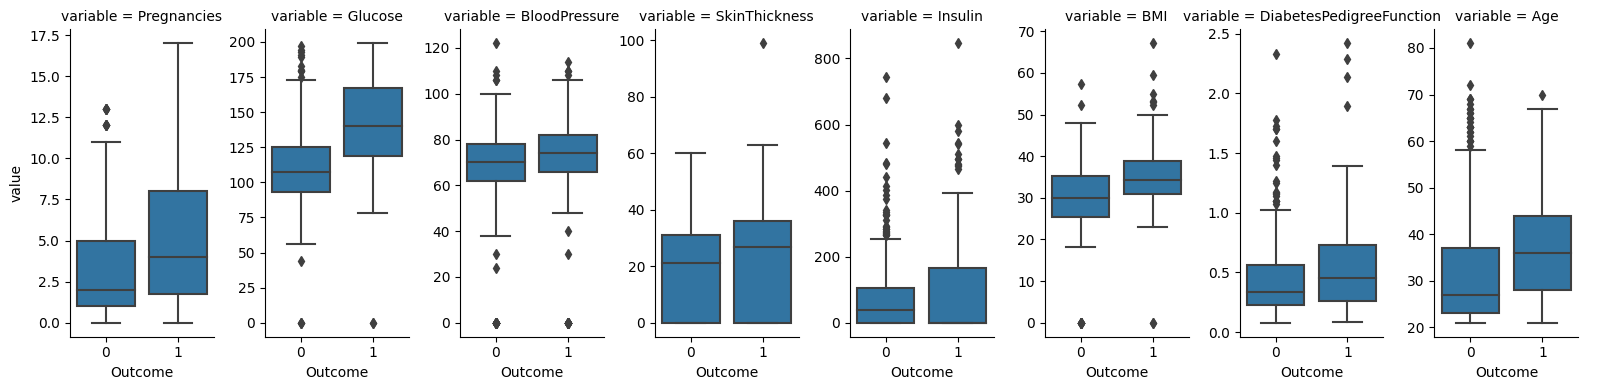

In [36]:

diabetes_dataset_df_m = pd.melt(diabetes_dataset_df, id_vars=['Outcome'])
diabetes_dataset_df_m

g = sns.FacetGrid(diabetes_dataset_df_m, col="variable", height=4, aspect=.5, sharey=False )
g.map(sns.boxplot, "Outcome", "value")
g.add_legend()
plt.show()



The seaborn library allows to draw a correlation matrix through the pairplot() function. 

This allows us to explore relationship between two features.

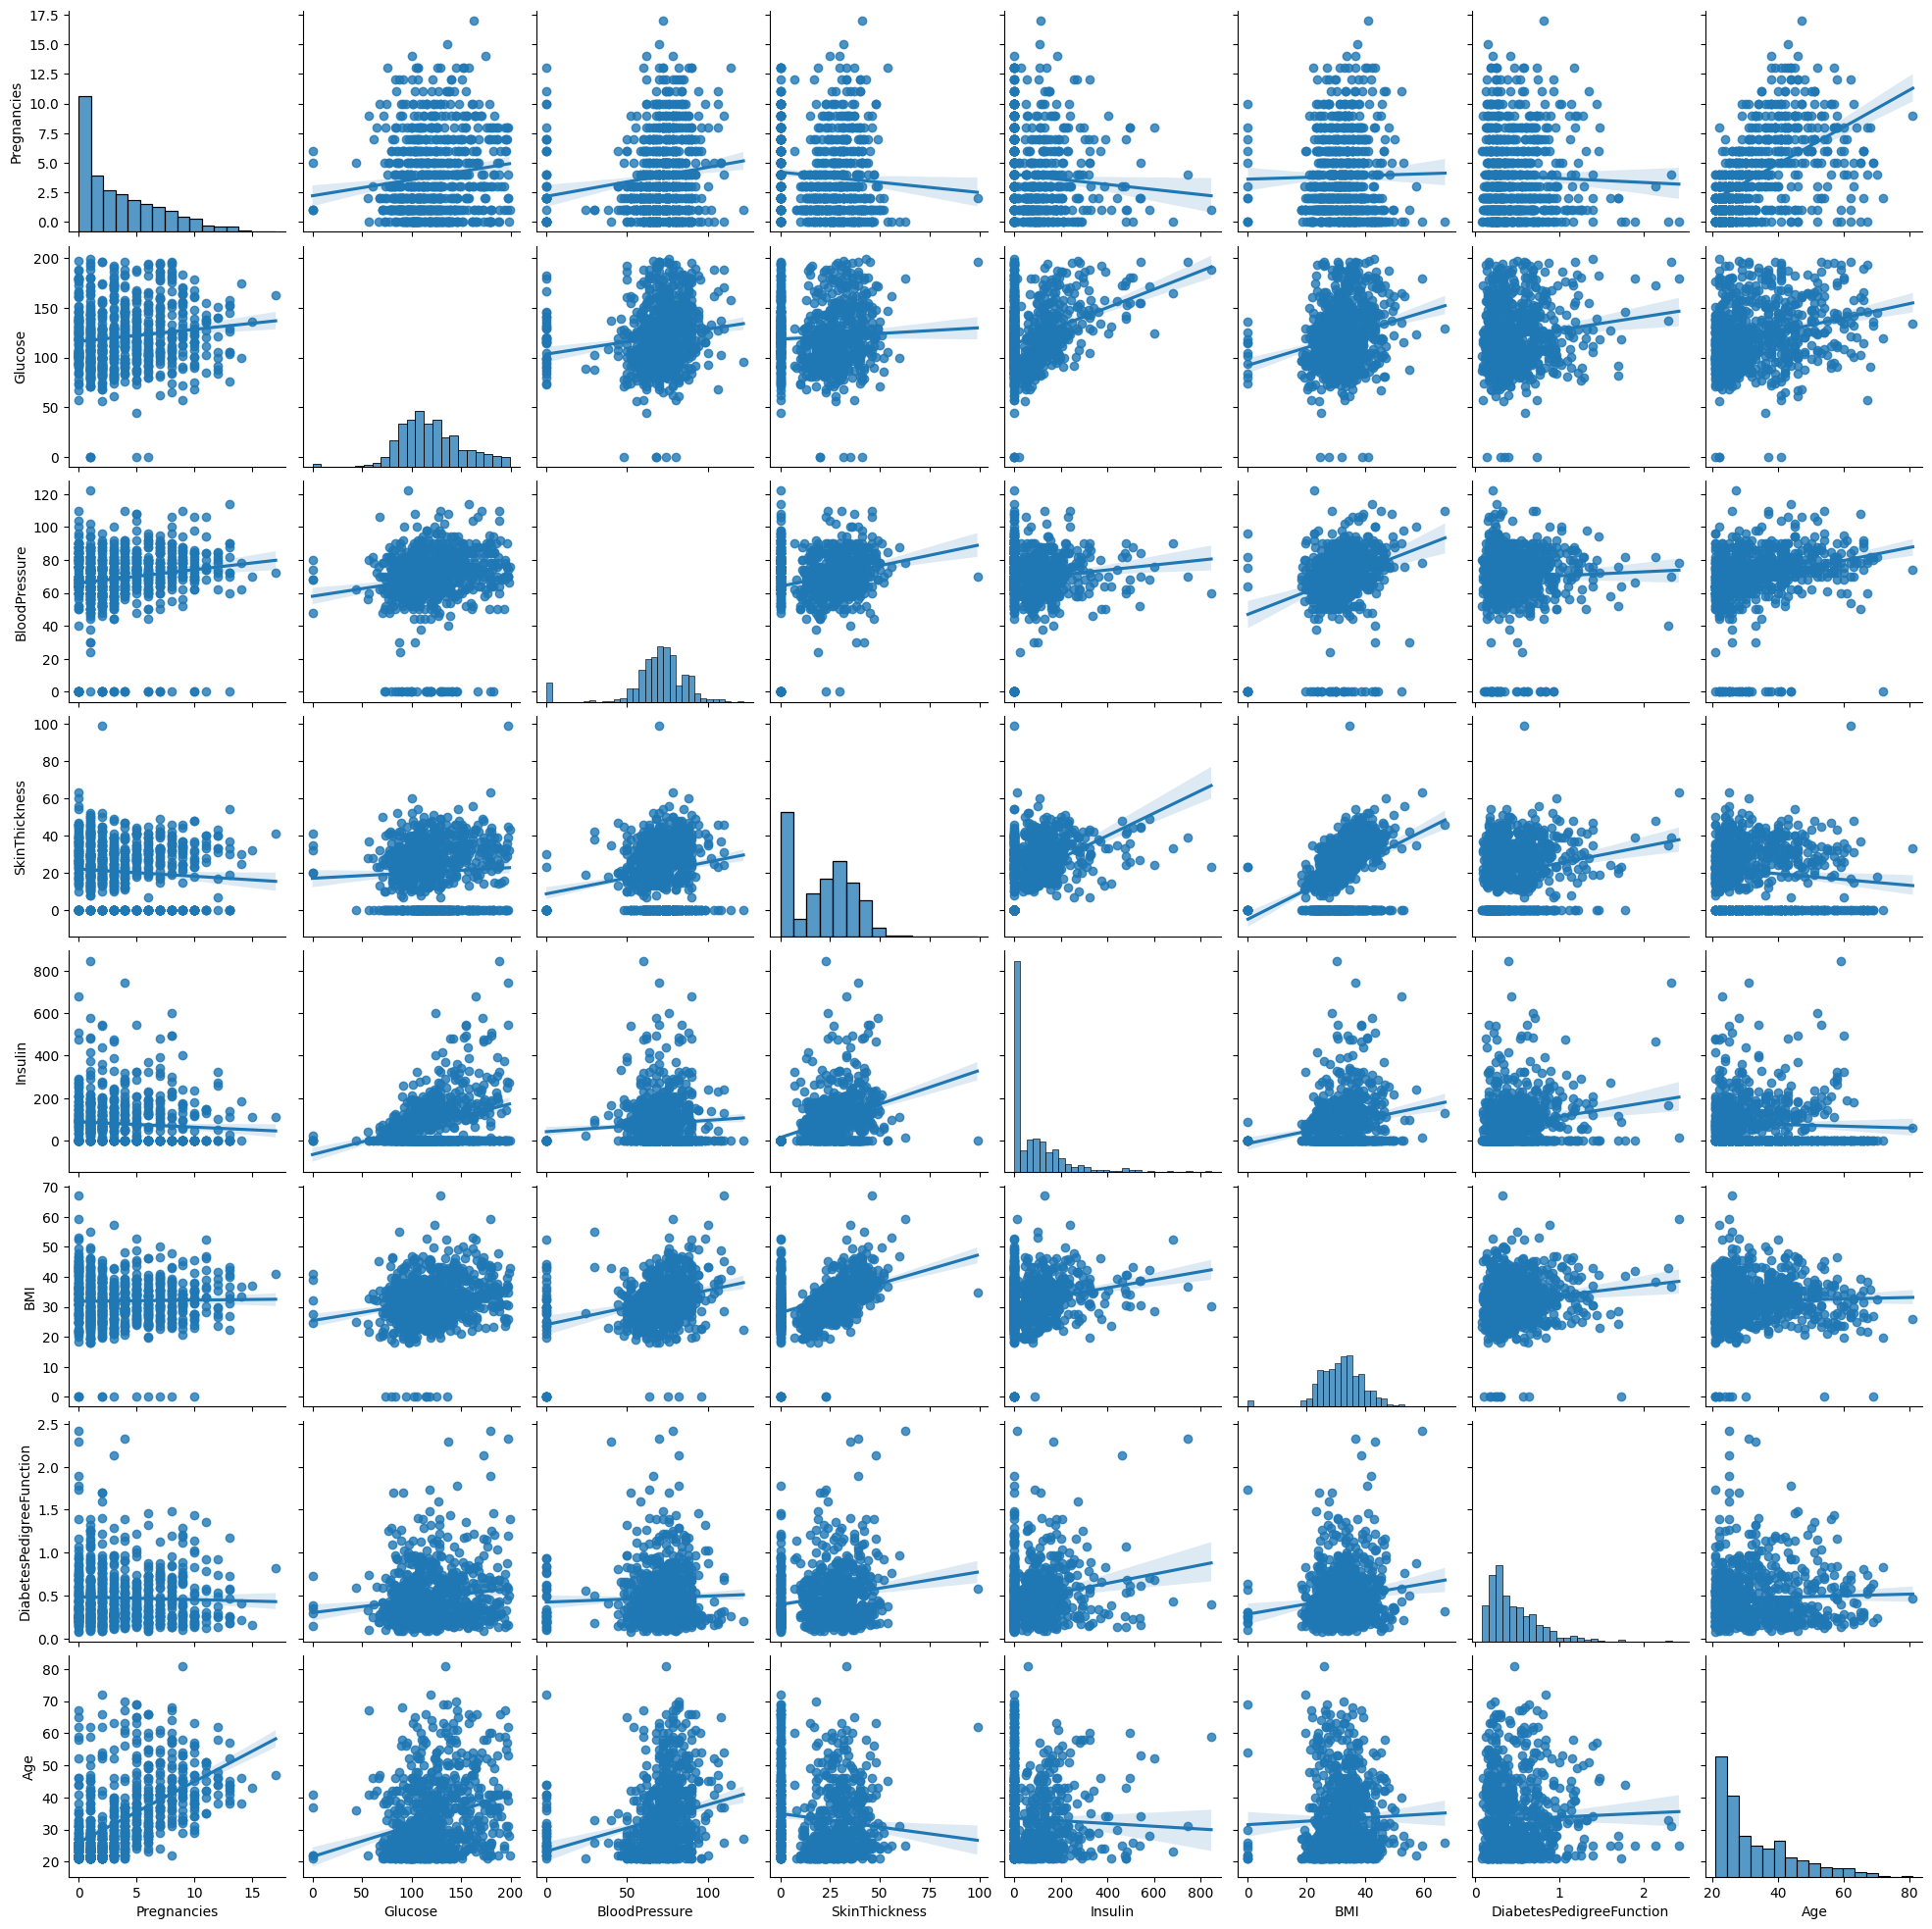

In [38]:
# Correlation plot with regression line
sns.pairplot(X_full, kind="reg")
plt.show()


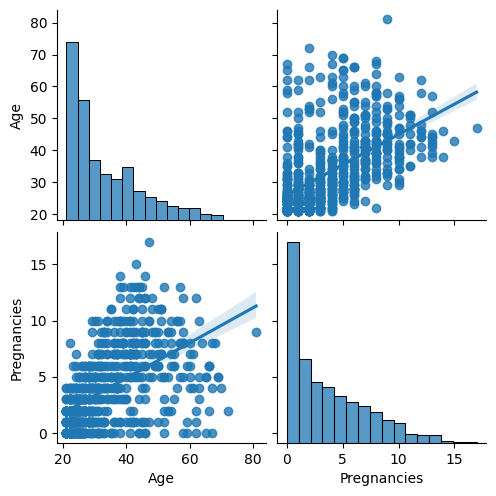

In [40]:
# Take only 2 features to make visualization easier
# Correlation plot with regression line
sns.pairplot(X_full[["Age", "Pregnancies"]], kind="reg")
plt.show()


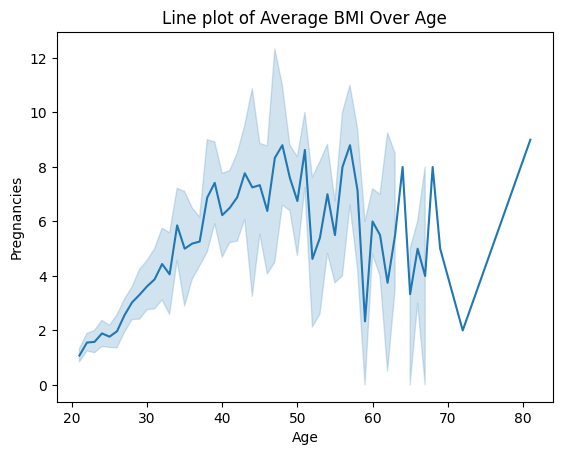

In [47]:
## Explore the pattern of change of one feature with respect to another feature

X_full_sort = X_full.sort_values("Age")
sns.lineplot(x='Age', y='Pregnancies', data=X_full_sort)
plt.title('Line plot of Average BMI Over Age')
plt.show()

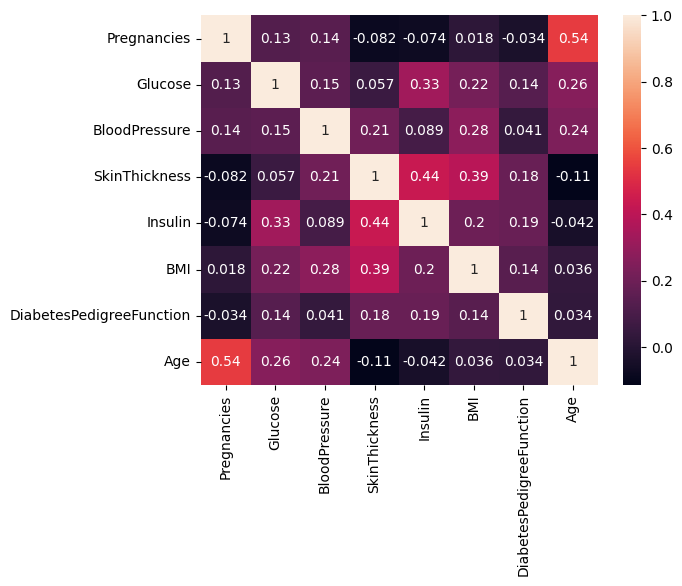

In [49]:
# Correlation plot with regression line

X_full.corr()

sns.heatmap(X_full.corr(), annot= True)
plt.show()


### Your Task

Using the same lipid data you need to complete the following tasks.


Task 1. Assign column names to the feataure data frame

    V1. Age of the patient. Any patient whose age exceeded 89 is listed as being of age "90".
    V2. Gender of the patient
    V3. Total Bilirubin
    V4. Direct Bilirubin
    V5. Alkphos Alkaline Phosphatase
    V6. Sgpt Alanine Aminotransferase
    V7. Sgot Aspartate Aminotransferase
    V8. Total Proteins
    V9. Albumin
    V10. A/G Ratio Albumin and Globulin Ratio
    
    and 
    'target as 11th column name

In [4]:
## Load the lipd data set.
lipid_data = pd.read_csv("lipid_data.csv", sep = ","); 

## Assign column labels to the data frame. 

lipid_data.columns = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Phosphatase", "Al_Aminotransferase", "As_Aminotransferase", "Total Proteins", "Albumin", "A/G Ratio", "target"] 

lipid_data


,Age,Gender,Total Bilirubin,Direct Bilirubin,Phosphatase,Al_Aminotransferase,As_Aminotransferase,Total Proteins,Albumin,A/G Ratio,target
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40.0,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52.0,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31.0,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


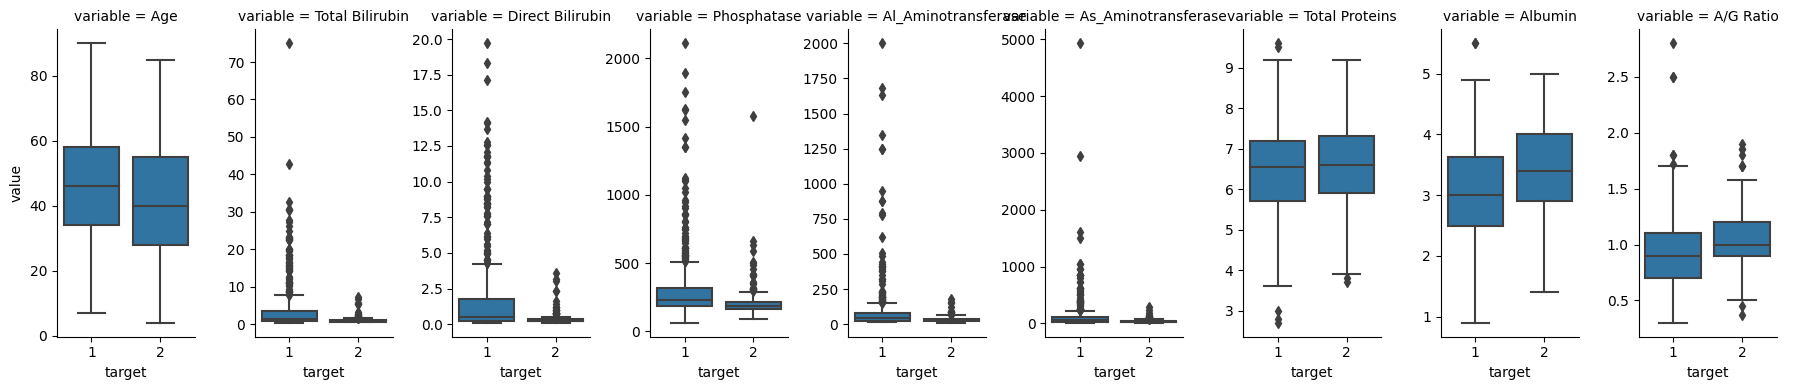

In [6]:
## 2. Generate boxplots for each. 
##      2.1 Melt the data frame to make sure 
##      2.2 For each feature use boxplot to visualize the distribution between Target "1" & "2"
##      2.3 Which feature has the largest distribution difference betwee target class "1" & "2" ?


lipid_data_m = pd.melt(lipid_data, id_vars=[ 'Gender', 'target'])

g = sns.FacetGrid(lipid_data_m, col="variable", height=4, aspect=.5, sharey=False )
g.map(sns.boxplot, "target", "value")
g.add_legend()
plt.show()


##  2.3
# Answer : There are some minor difference in "Albumin" level and "Direct Bilirubin" distribution  

## Task 3 Separate the categogical and numerical feature matrix
Lipid data contains one categorical feature. The rest are numerical features. 
Separate them in two data frames.  

In [ ]:
## Task 3 Separate the categogical and numerical feature matrix
X_full_new = lipid_data.loc[ :, lipid_data.columns!= "target" ]
X_numerical = X_full_new.loc[ :, X_full_new.columns!= "Gender" ]
X_categorical = X_full_new[ "Gender"]

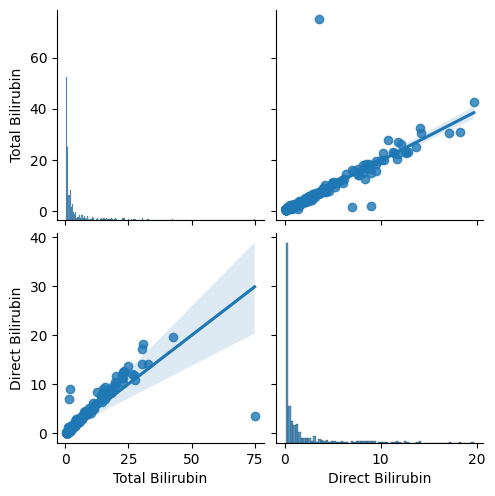

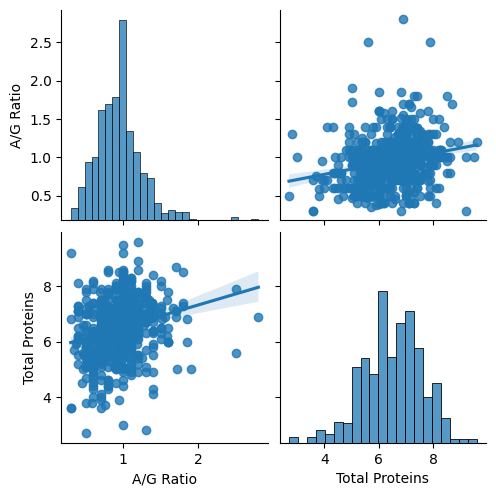

In [7]:
## Task 4
## 4. Generate a pairwise scatterplot to investigate correlation between features. 
## 4.1 Plot pairwise scatter plot between 
##     4.1.1 "Total Bilirubin" vs "Direct Bilirubin"
##     4.1.2 "A/G Ratio" vs "Total Proteins"


sns.pairplot(X_numerical[ [ "Total Bilirubin", "Direct Bilirubin" ] ], kind="reg")
plt.show()


sns.pairplot(X_numerical[ [ "A/G Ratio", "Total Proteins" ] ], kind="reg")
plt.show()


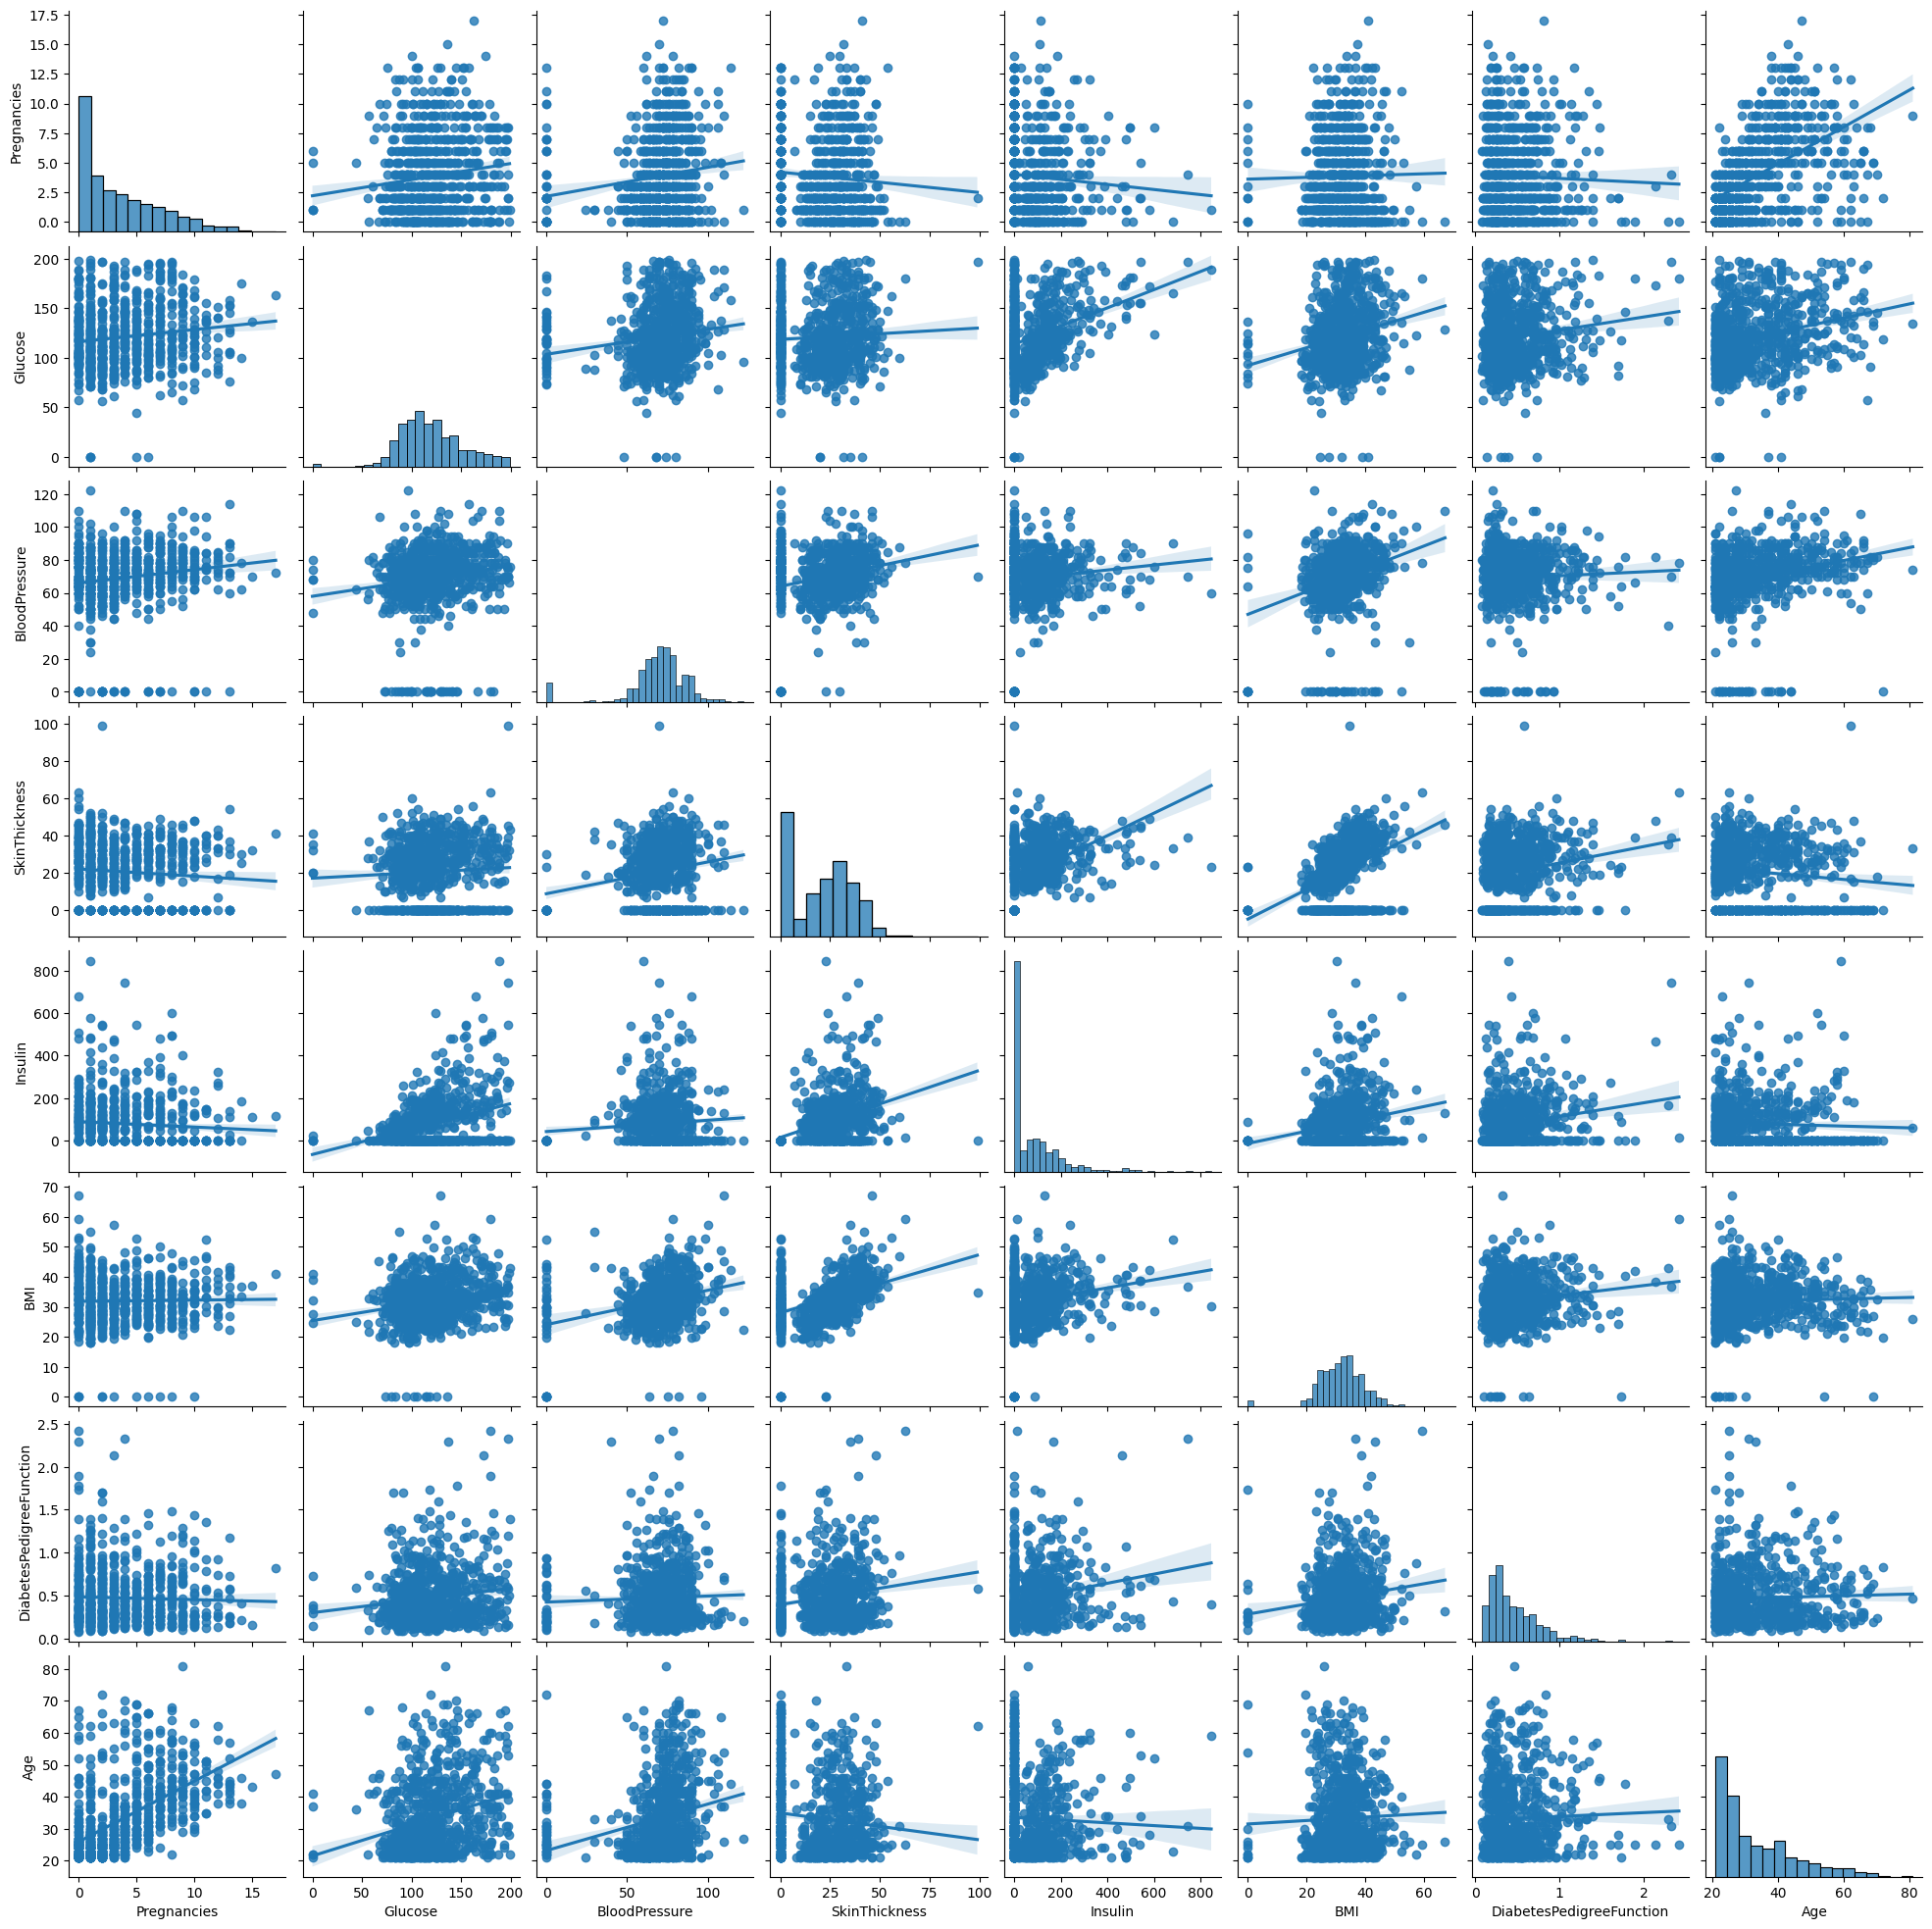

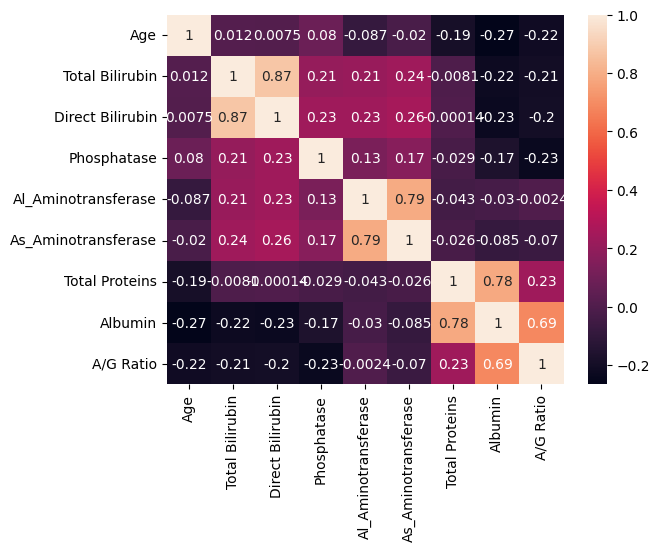

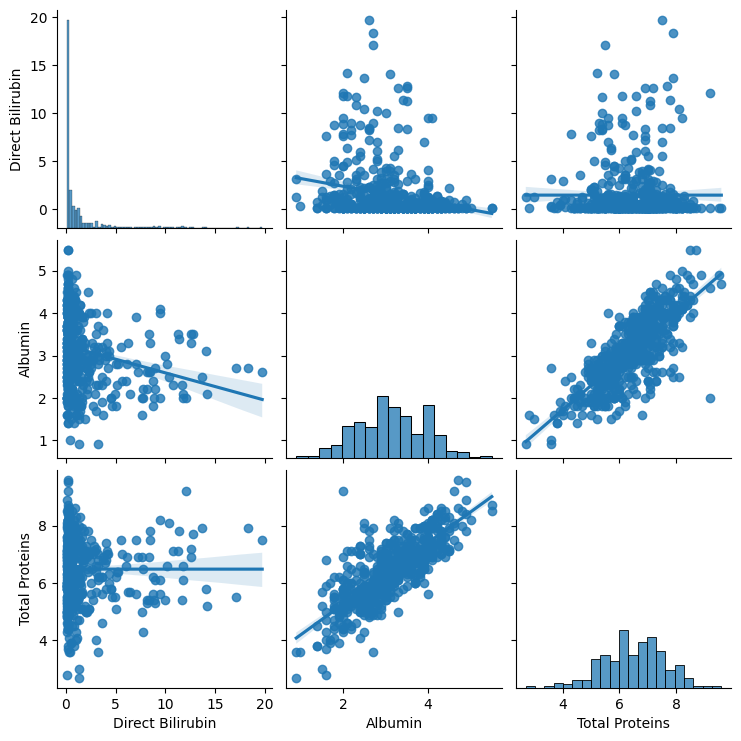

In [8]:
## Task 5
## 5.1 Generate a pairwise correlation healtmap.  
## 5.2 Separate the features that have more than 0.5 correlation between themselves.
## 5.3 Generate scatterplot for the separted features.

sns.heatmap(X_numerical.corr(), annot= True)
plt.show()


X_full_high_corr = X_numerical[ ["Direct Bilirubin", "Albumin", "Total Proteins"] ]
sns.pairplot(X_full_high_corr, kind="reg")
plt.show()


## 5.4 Which two features have the highest correlation between themselves ?
#  Answer :  "Total Bilirubin" and "Direct Bilirubin"

## 5.5 Which two features have the lowest correlation between themselves ? 
#  Answer :  "Age" and "Albumin"


#### 6. Feature Enigneering
    6.1 Convert Age (a continuous feature) in to a categorical one by binning the data into two disctinct bins (i) young (<= 50), and (ii) old ( > 50 ) 
    6.2 Plot distribution of "Total Bilirubin" across these two age groups and two target classes "1" & "2". Use seaborn boxplot.  
    6.3 Visually, is there any noticable differnce in "Total Bilirubin" level in young vs old patient group in either of the target classes ? 

<Axes: xlabel='target', ylabel='Total Bilirubin'>

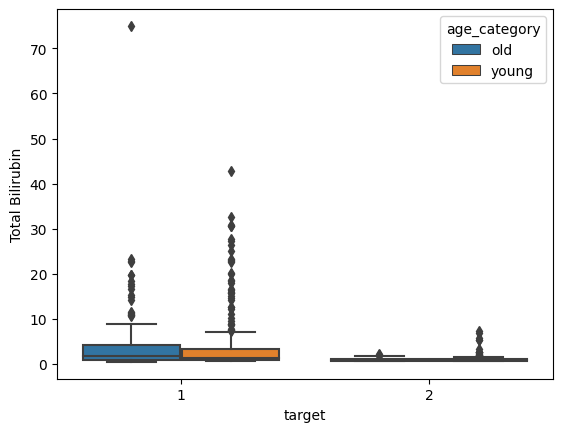

In [15]:
## 6.1 Add an age category column by 
lipid_data['age_category'] = np.where(lipid_data['Age'] <= 50, 'young', 'old')


# 6.2 Plot distribution of "Total Bilirubin" across these two age groups and two target classes "1" & "2". Use seaborn boxplot.  
sns.boxplot( data = lipid_data[ [ 'age_category', 'target', 'Total Bilirubin'] ], x= 'target', y='Total Bilirubin', hue= 'age_category' )

# 6.3 Visually, is there any noticable differnce in "Total Bilirubin" level in young vs old patient group in either of the target classes ? 
# Answer :  
